In [1]:
#importation of the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#collecting and creating the dataset
SA=pd.read_csv('Sales_January_2019.csv')
SF=pd.read_csv('Sales_February_2019.csv')
SM=pd.read_csv('Sales_March_2019.csv')
SAP=pd.read_csv('Sales_April_2019.csv')
SM=pd.read_csv('Sales_May_2019.csv')
SJ=pd.read_csv('Sales_June_2019.csv')
SJU=pd.read_csv('Sales_July_2019.csv')
SAU=pd.read_csv('Sales_August_2019.csv')
SS=pd.read_csv('Sales_September_2019.csv')
SO=pd.read_csv('Sales_October_2019.csv')
SN=pd.read_csv('Sales_November_2019.csv')
SD=pd.read_csv('Sales_December_2019.csv')

In [3]:
all_data=pd.concat([SA,SF,SM,SAP,SM,SJ,SJU,SAU,SS,SO,SN,SD], ignore_index=True)
print(all_data)

       Order ID                     Product Quantity Ordered Price Each  \
0        141234                      iPhone                1        700   
1        141235    Lightning Charging Cable                1      14.95   
2        141236            Wired Headphones                2      11.99   
3        141237            27in FHD Monitor                1     149.99   
4        141238            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
188254   319666    Lightning Charging Cable                1      14.95   
188255   319667       AA Batteries (4-pack)                2       3.84   
188256   319668             Vareebadd Phone                1        400   
188257   319669            Wired Headphones                1      11.99   
188258   319670  Bose SoundSport Headphones                1      99.99   

            Order Date                        Purchase Address  
0       01/22/19 21:25         944

In [4]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
all_data.isnull().sum()

Order ID            556
Product             556
Quantity Ordered    556
Price Each          556
Order Date          556
Purchase Address    556
dtype: int64

In [6]:
all_data=all_data.dropna()

In [7]:
all_data.shape

(187703, 6)

# Which month has the most sales ?

In [8]:
#Splitting the date to get the months values
def month (x):
    return x.split('/')[0]

In [9]:
all_data['Month']=all_data['Order Date'].apply(month)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
188254,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
188255,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
188256,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
188257,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [10]:
all_data['Month'].unique()

array(['01', 'Order Date', '02', '03', '05', '06', '04', '07', '08', '09',
       '10', '11', '12'], dtype=object)

In [11]:
all_data=all_data[all_data['Month']!='Order Date']
all_data['Month'].unique()

array(['01', '02', '03', '05', '06', '04', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [12]:
all_data['Month']=all_data['Month'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data.dtypes

/var/folders/rg/rz3vxs_n37l4nz692qz8hmm40000gn/T/ipykernel_24592/1594611009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Month'].astype(int)
/var/folders/rg/rz3vxs_n37l4nz692qz8hmm40000gn/T/ipykernel_24592/1594611009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=all_data['Price Each'].astype(float)
/var/folders/rg/rz3vxs_n37l4nz692qz8hmm40000gn/T/ipykernel_24592/1594611009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [13]:
all_data['Sales']=all_data['Price Each']*all_data['Quantity Ordered']
all_data

/var/folders/rg/rz3vxs_n37l4nz692qz8hmm40000gn/T/ipykernel_24592/2662354280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales']=all_data['Price Each']*all_data['Quantity Ordered']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
188254,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
188255,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
188256,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
188257,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


In [14]:
all_data.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3        3207.50
4     3385499.82
5     6294654.21
6     2580339.60
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

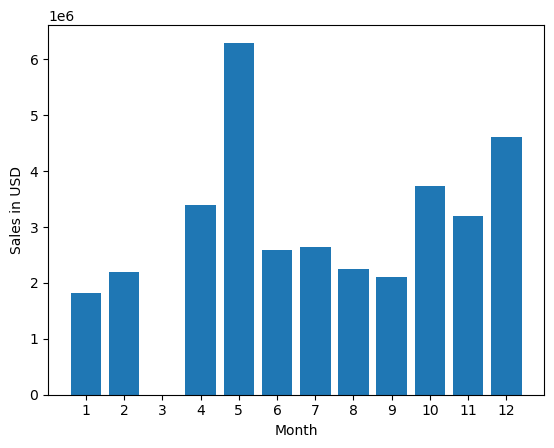

In [15]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show

# Which city has the most sales ?

In [16]:
#Splitting to get the city
def city (x):
    return x.split(',')[1]

In [17]:
all_data['City']=all_data['Purchase Address'].apply(city)
all_data

/var/folders/rg/rz3vxs_n37l4nz692qz8hmm40000gn/T/ipykernel_24592/640088211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City']=all_data['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin
...,...,...,...,...,...,...,...,...,...
188254,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco
188255,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles
188256,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle
188257,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas


all_data.groupby('City')['City'].count()

<function matplotlib.pyplot.show(close=None, block=None)>

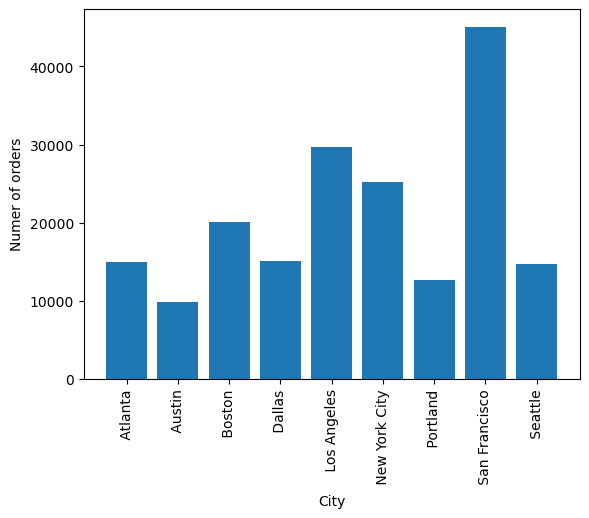

In [18]:
plt.bar(all_data.groupby('City')['City'].count().index,all_data.groupby('City')['City'].count().values)
plt.xticks(rotation='vertical')
plt.ylabel('Numer of orders')
plt.xlabel('City')
plt.show

# When is the best time to do ad campaigns to get more sales ?

In [19]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
all_data

/var/folders/rg/rz3vxs_n37l4nz692qz8hmm40000gn/T/ipykernel_24592/1389238267.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
/var/folders/rg/rz3vxs_n37l4nz692qz8hmm40000gn/T/ipykernel_24592/1389238267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,11
...,...,...,...,...,...,...,...,...,...,...
188254,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,20
188255,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12
188256,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle,6
188257,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas,10


In [20]:
keys=[]
hours=[]
for key,hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))
hours

[3961,
 2367,
 1245,
 826,
 871,
 1317,
 2471,
 4039,
 6360,
 8868,
 11058,
 12403,
 12780,
 12143,
 11098,
 10186,
 10407,
 11042,
 12364,
 12972,
 12381,
 11001,
 8868,
 6322]

Text(0, 0.5, 'Number of orders')

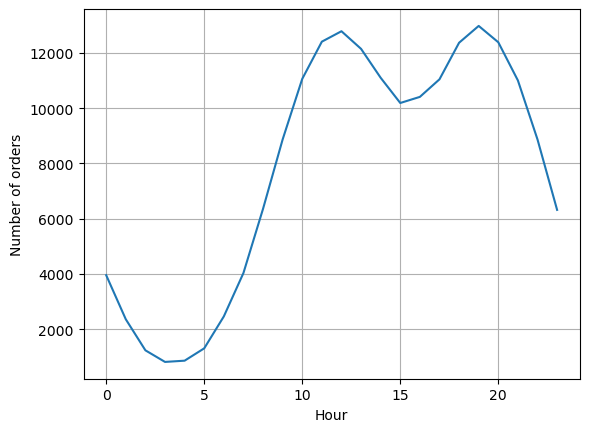

In [21]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')

# Which product makes the most sales ?

<Axes: xlabel='Product'>

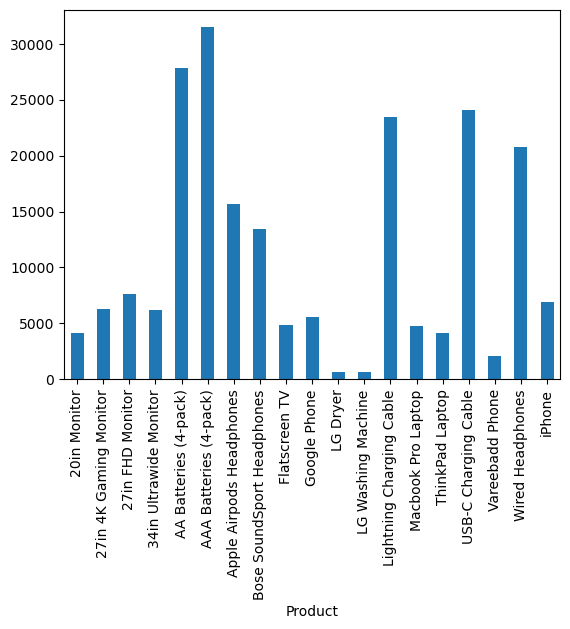

In [22]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [23]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [24]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

/var/folders/rg/rz3vxs_n37l4nz692qz8hmm40000gn/T/ipykernel_24592/2982701713.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation='vertical',size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

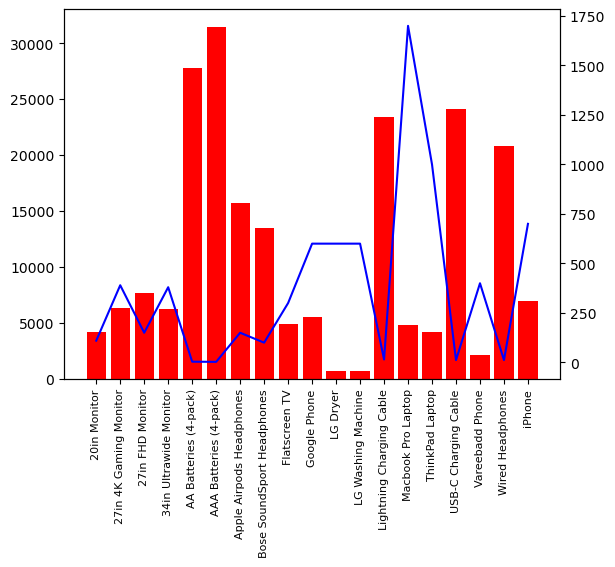

In [25]:
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='r')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation='vertical',size=8)
